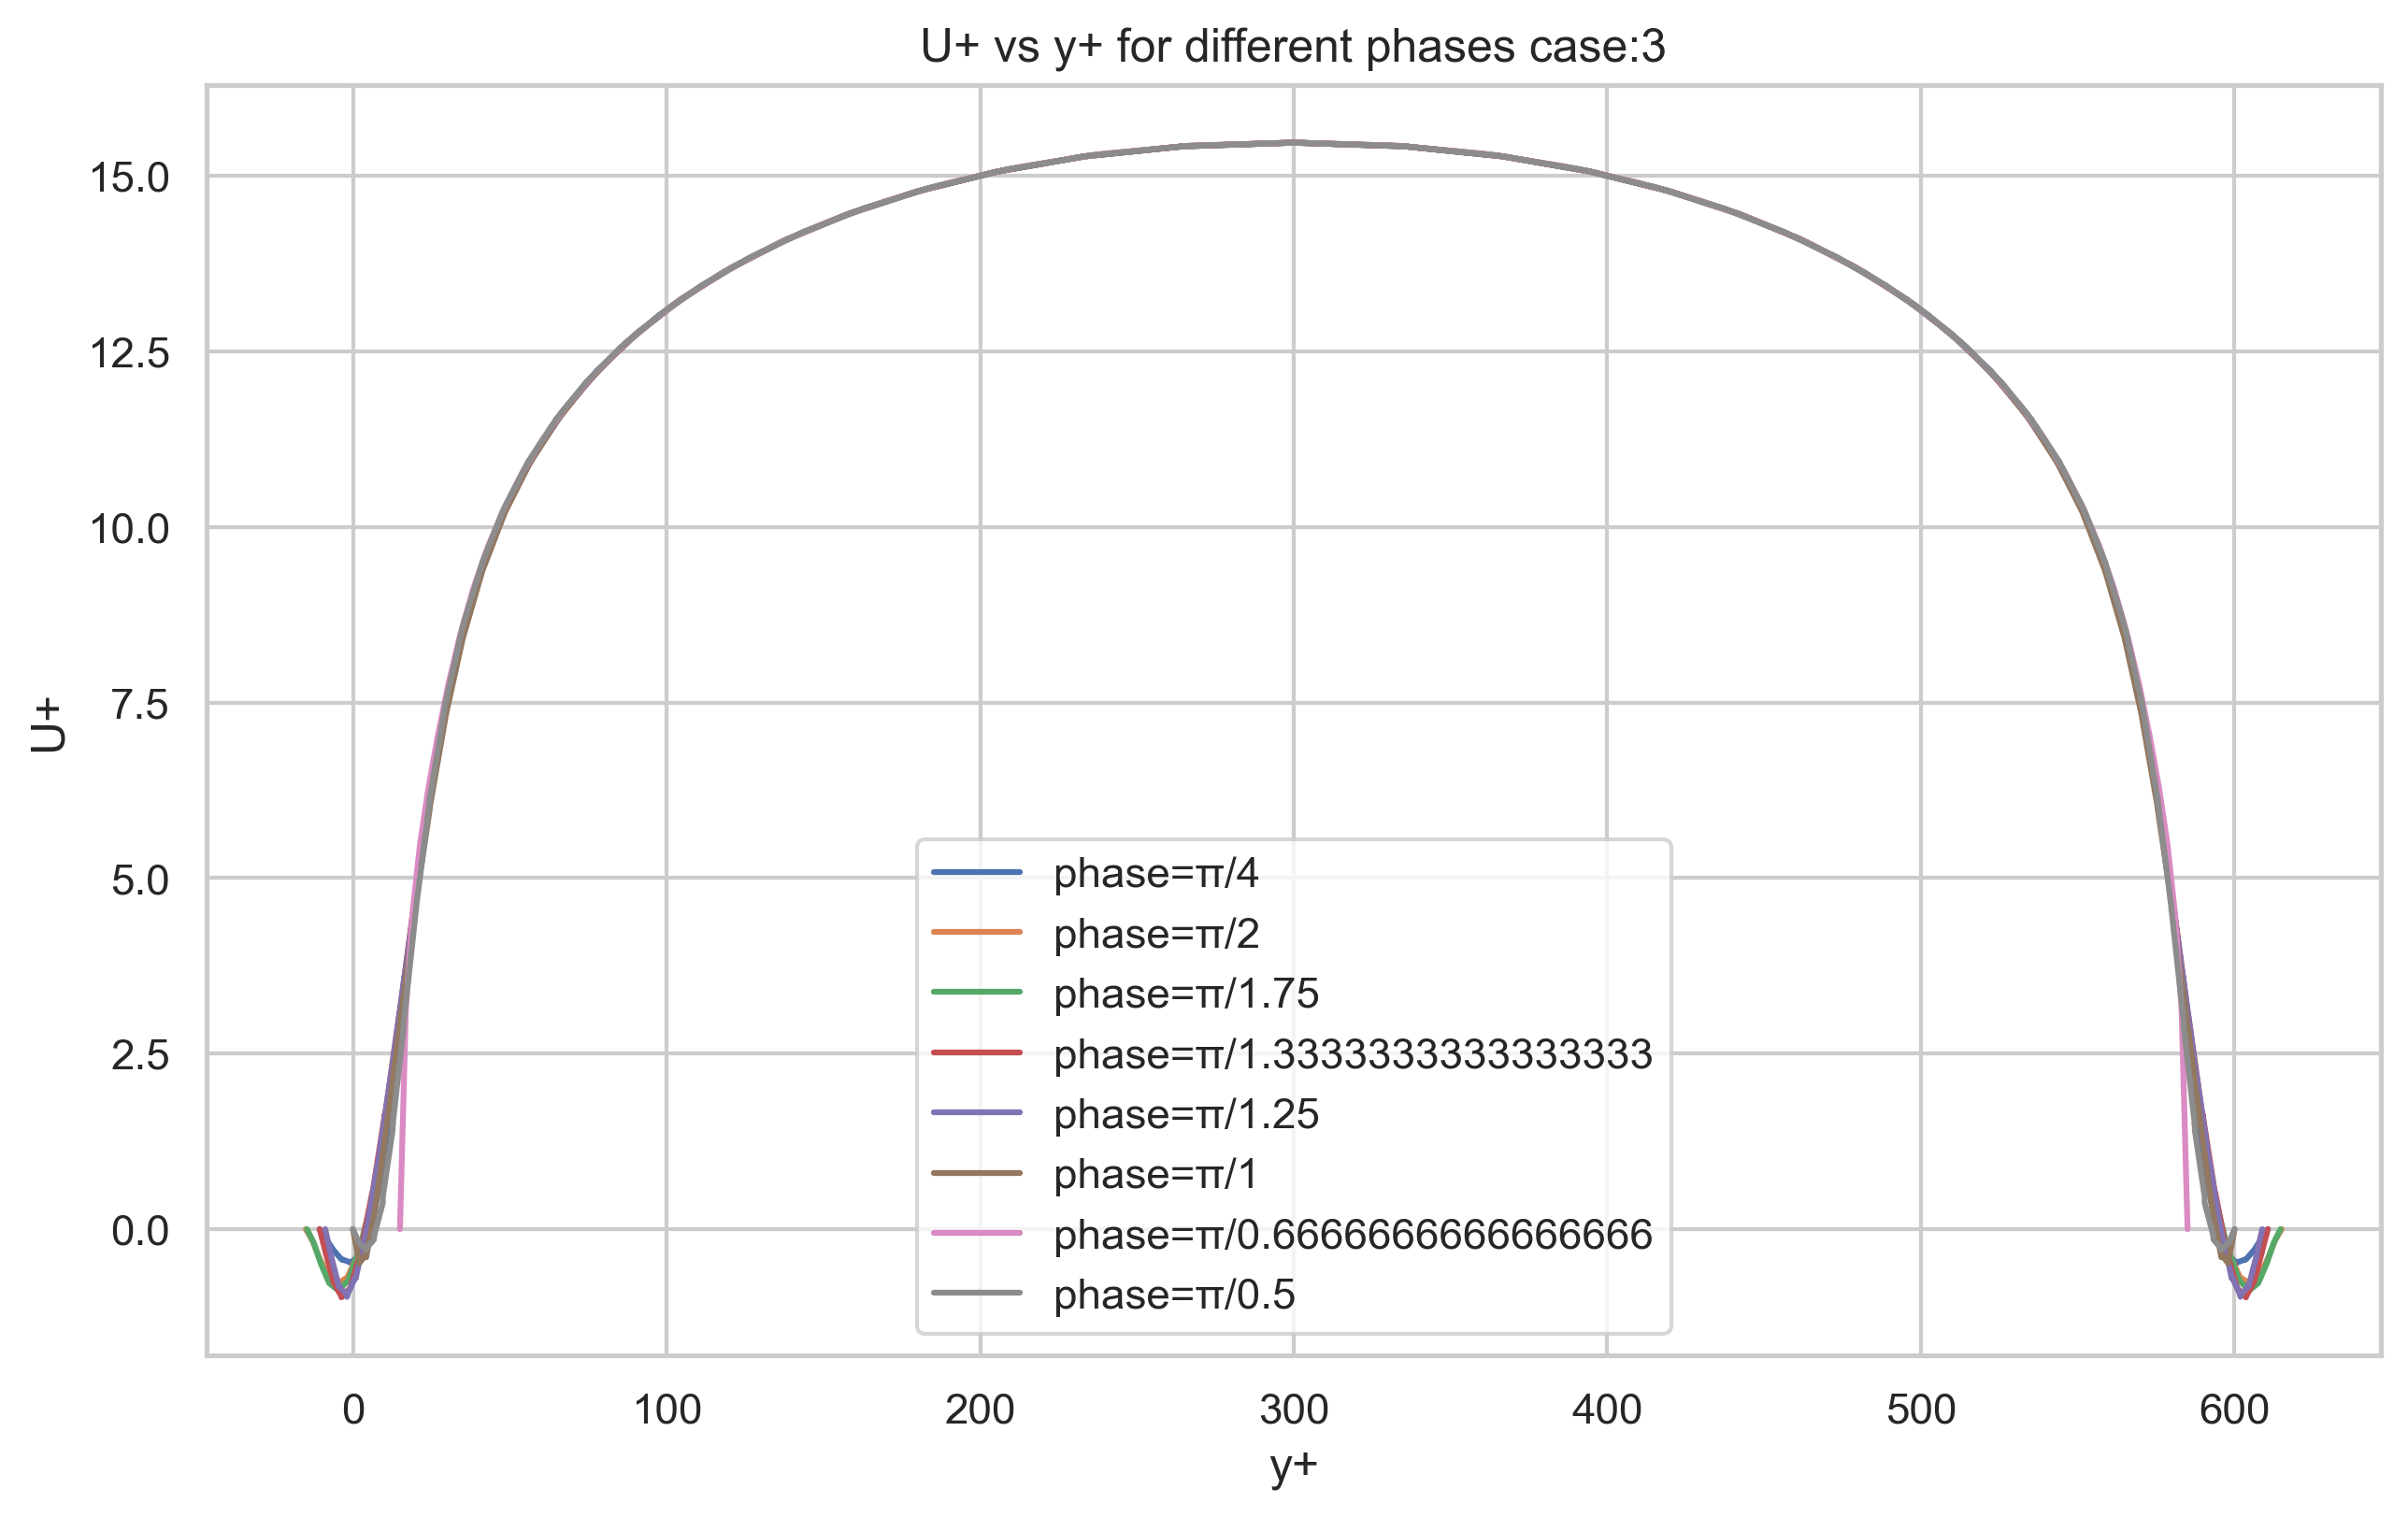

In [5]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

sim_num=3

for pi_div in [4, 2, 1.75, 1.3333333333333333, 1.25, 1, 0.6666666666666666, 0.5 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus', y='U_plus', label=f'phase=π/{pi_div}')

plt.title(f'U+ vs y+ for different phases case:{sim_num}')
plt.xlabel('y+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'u+ vs y+ phase comparison sim{sim_num}.png')
plt.show()


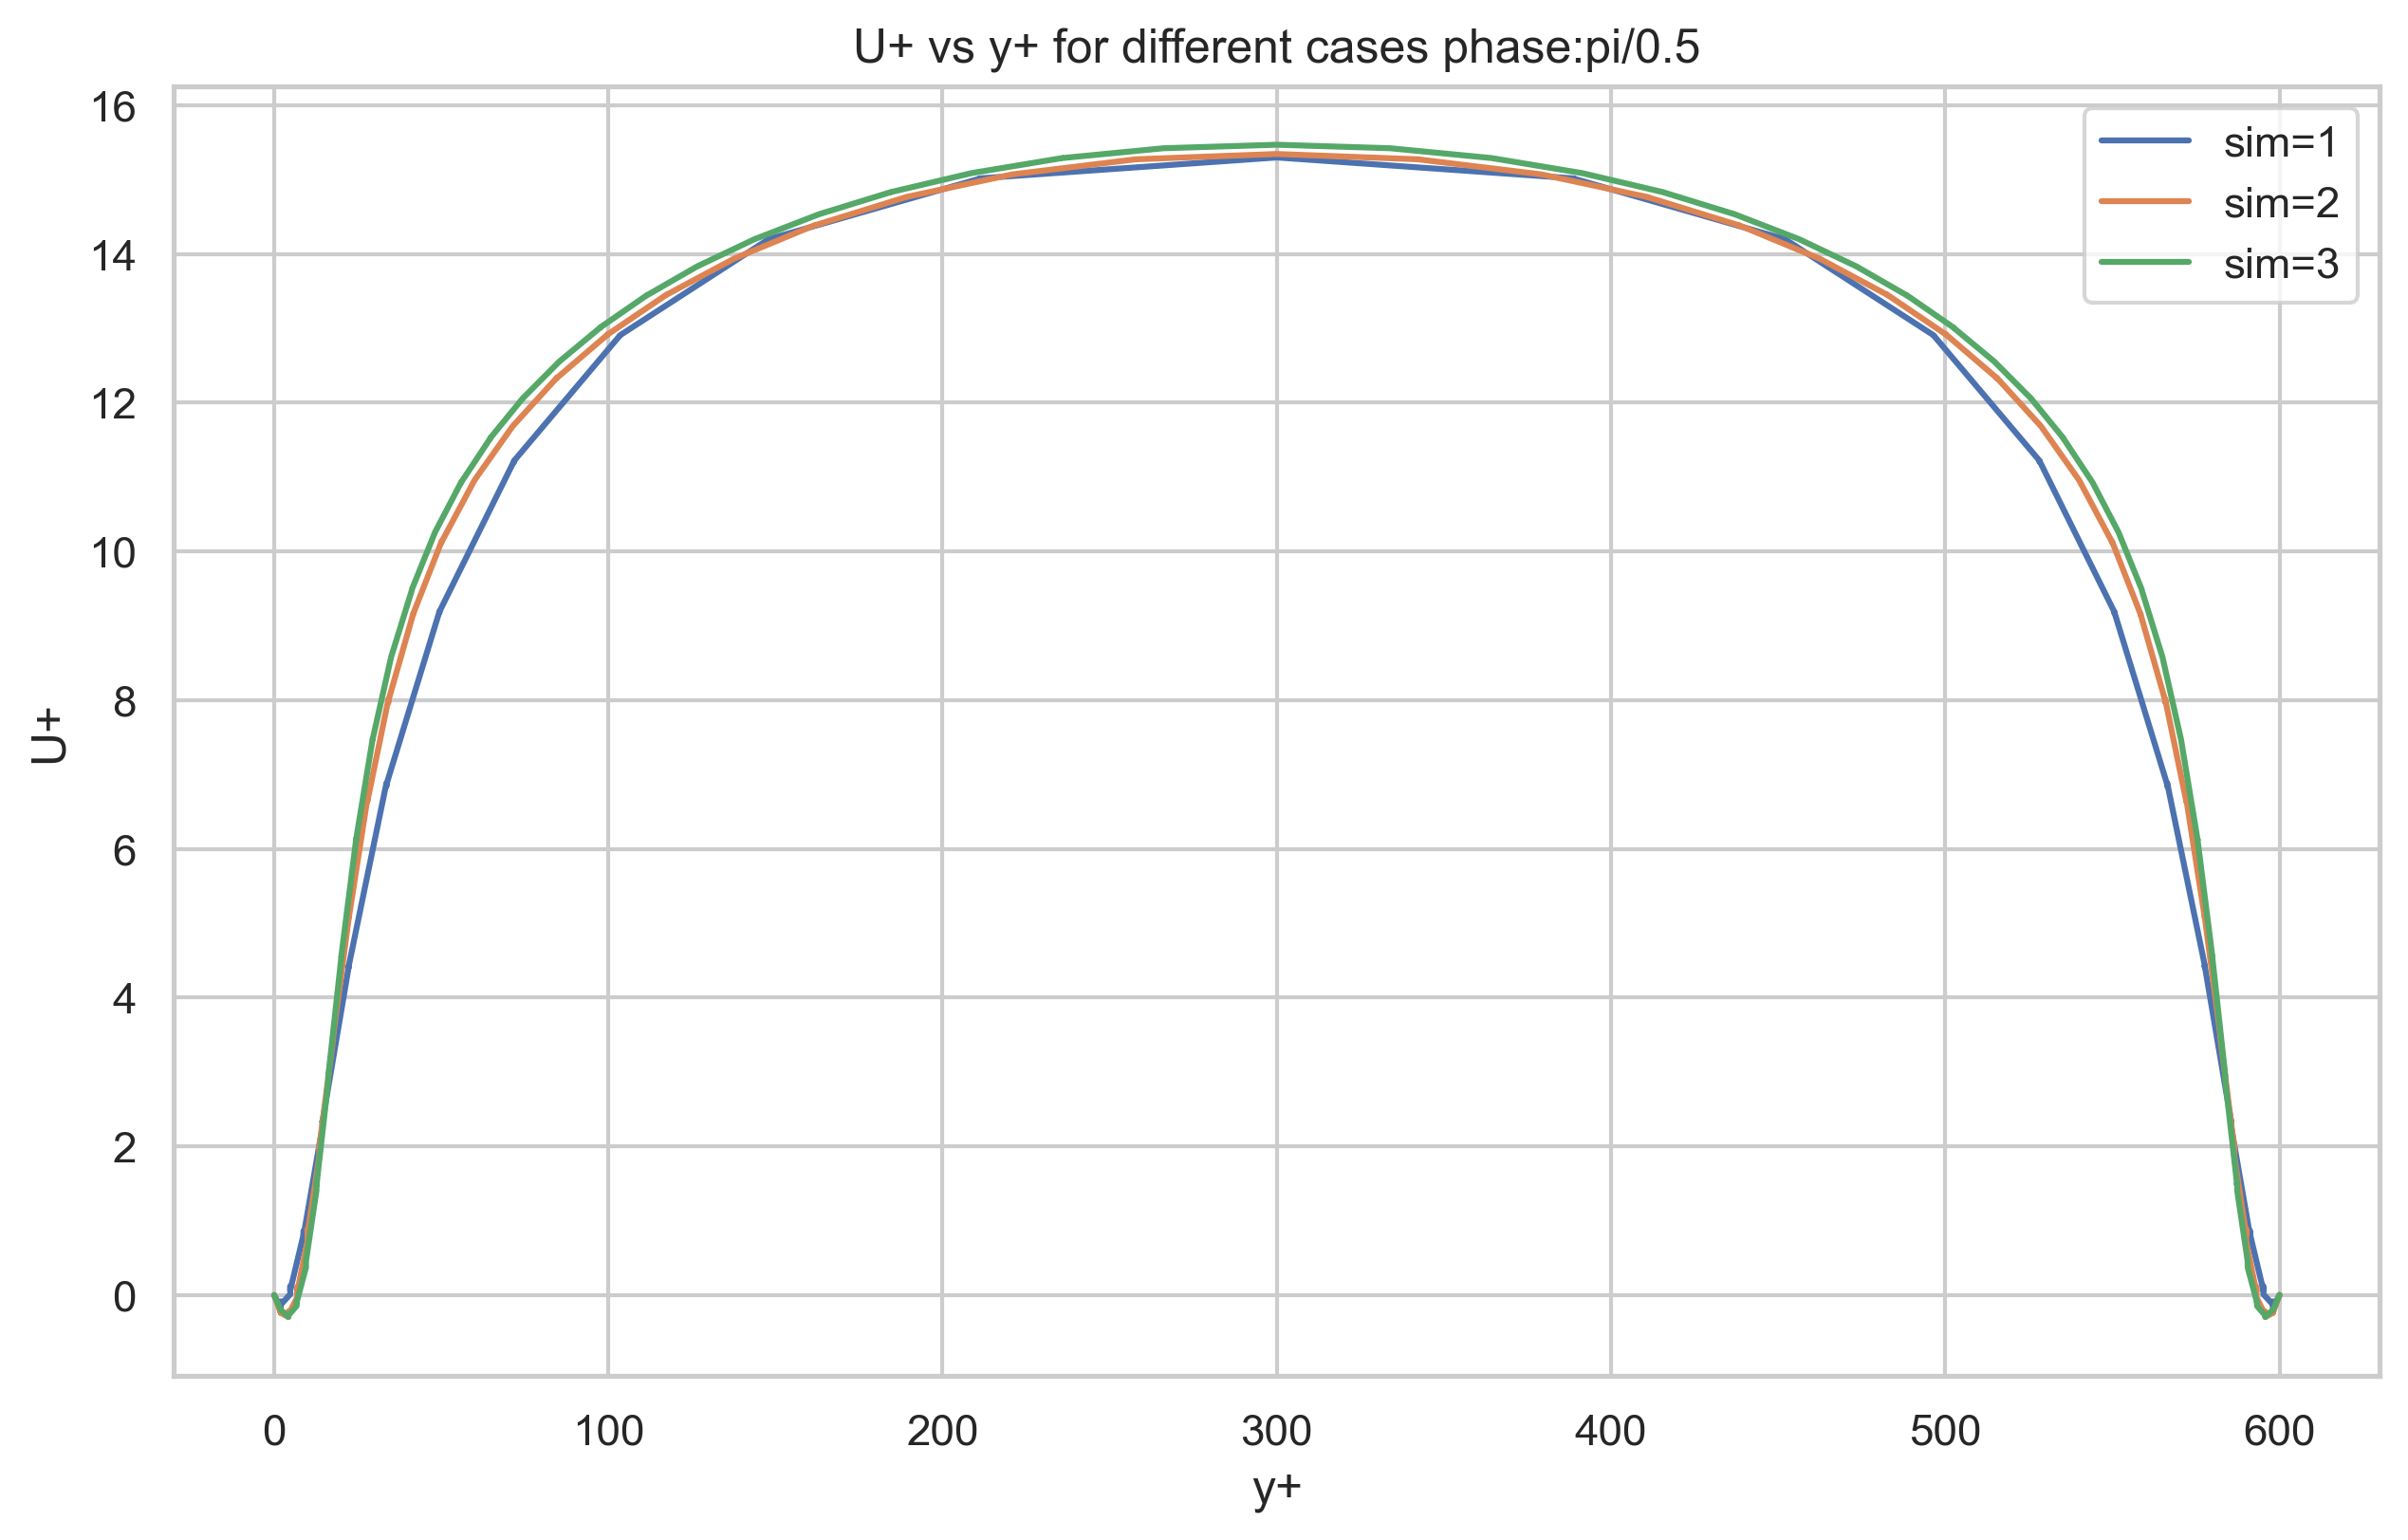

In [16]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

pi_div=0.5

for sim_num in [1,2,3 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus', y='U_plus', label=f'sim={sim_num}')

plt.title(f'U+ vs y+ for different cases phase:pi/{pi_div}')
plt.xlabel('y+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'u+ vs y+ case comparison phase piby{pi_div}.png')
plt.show()


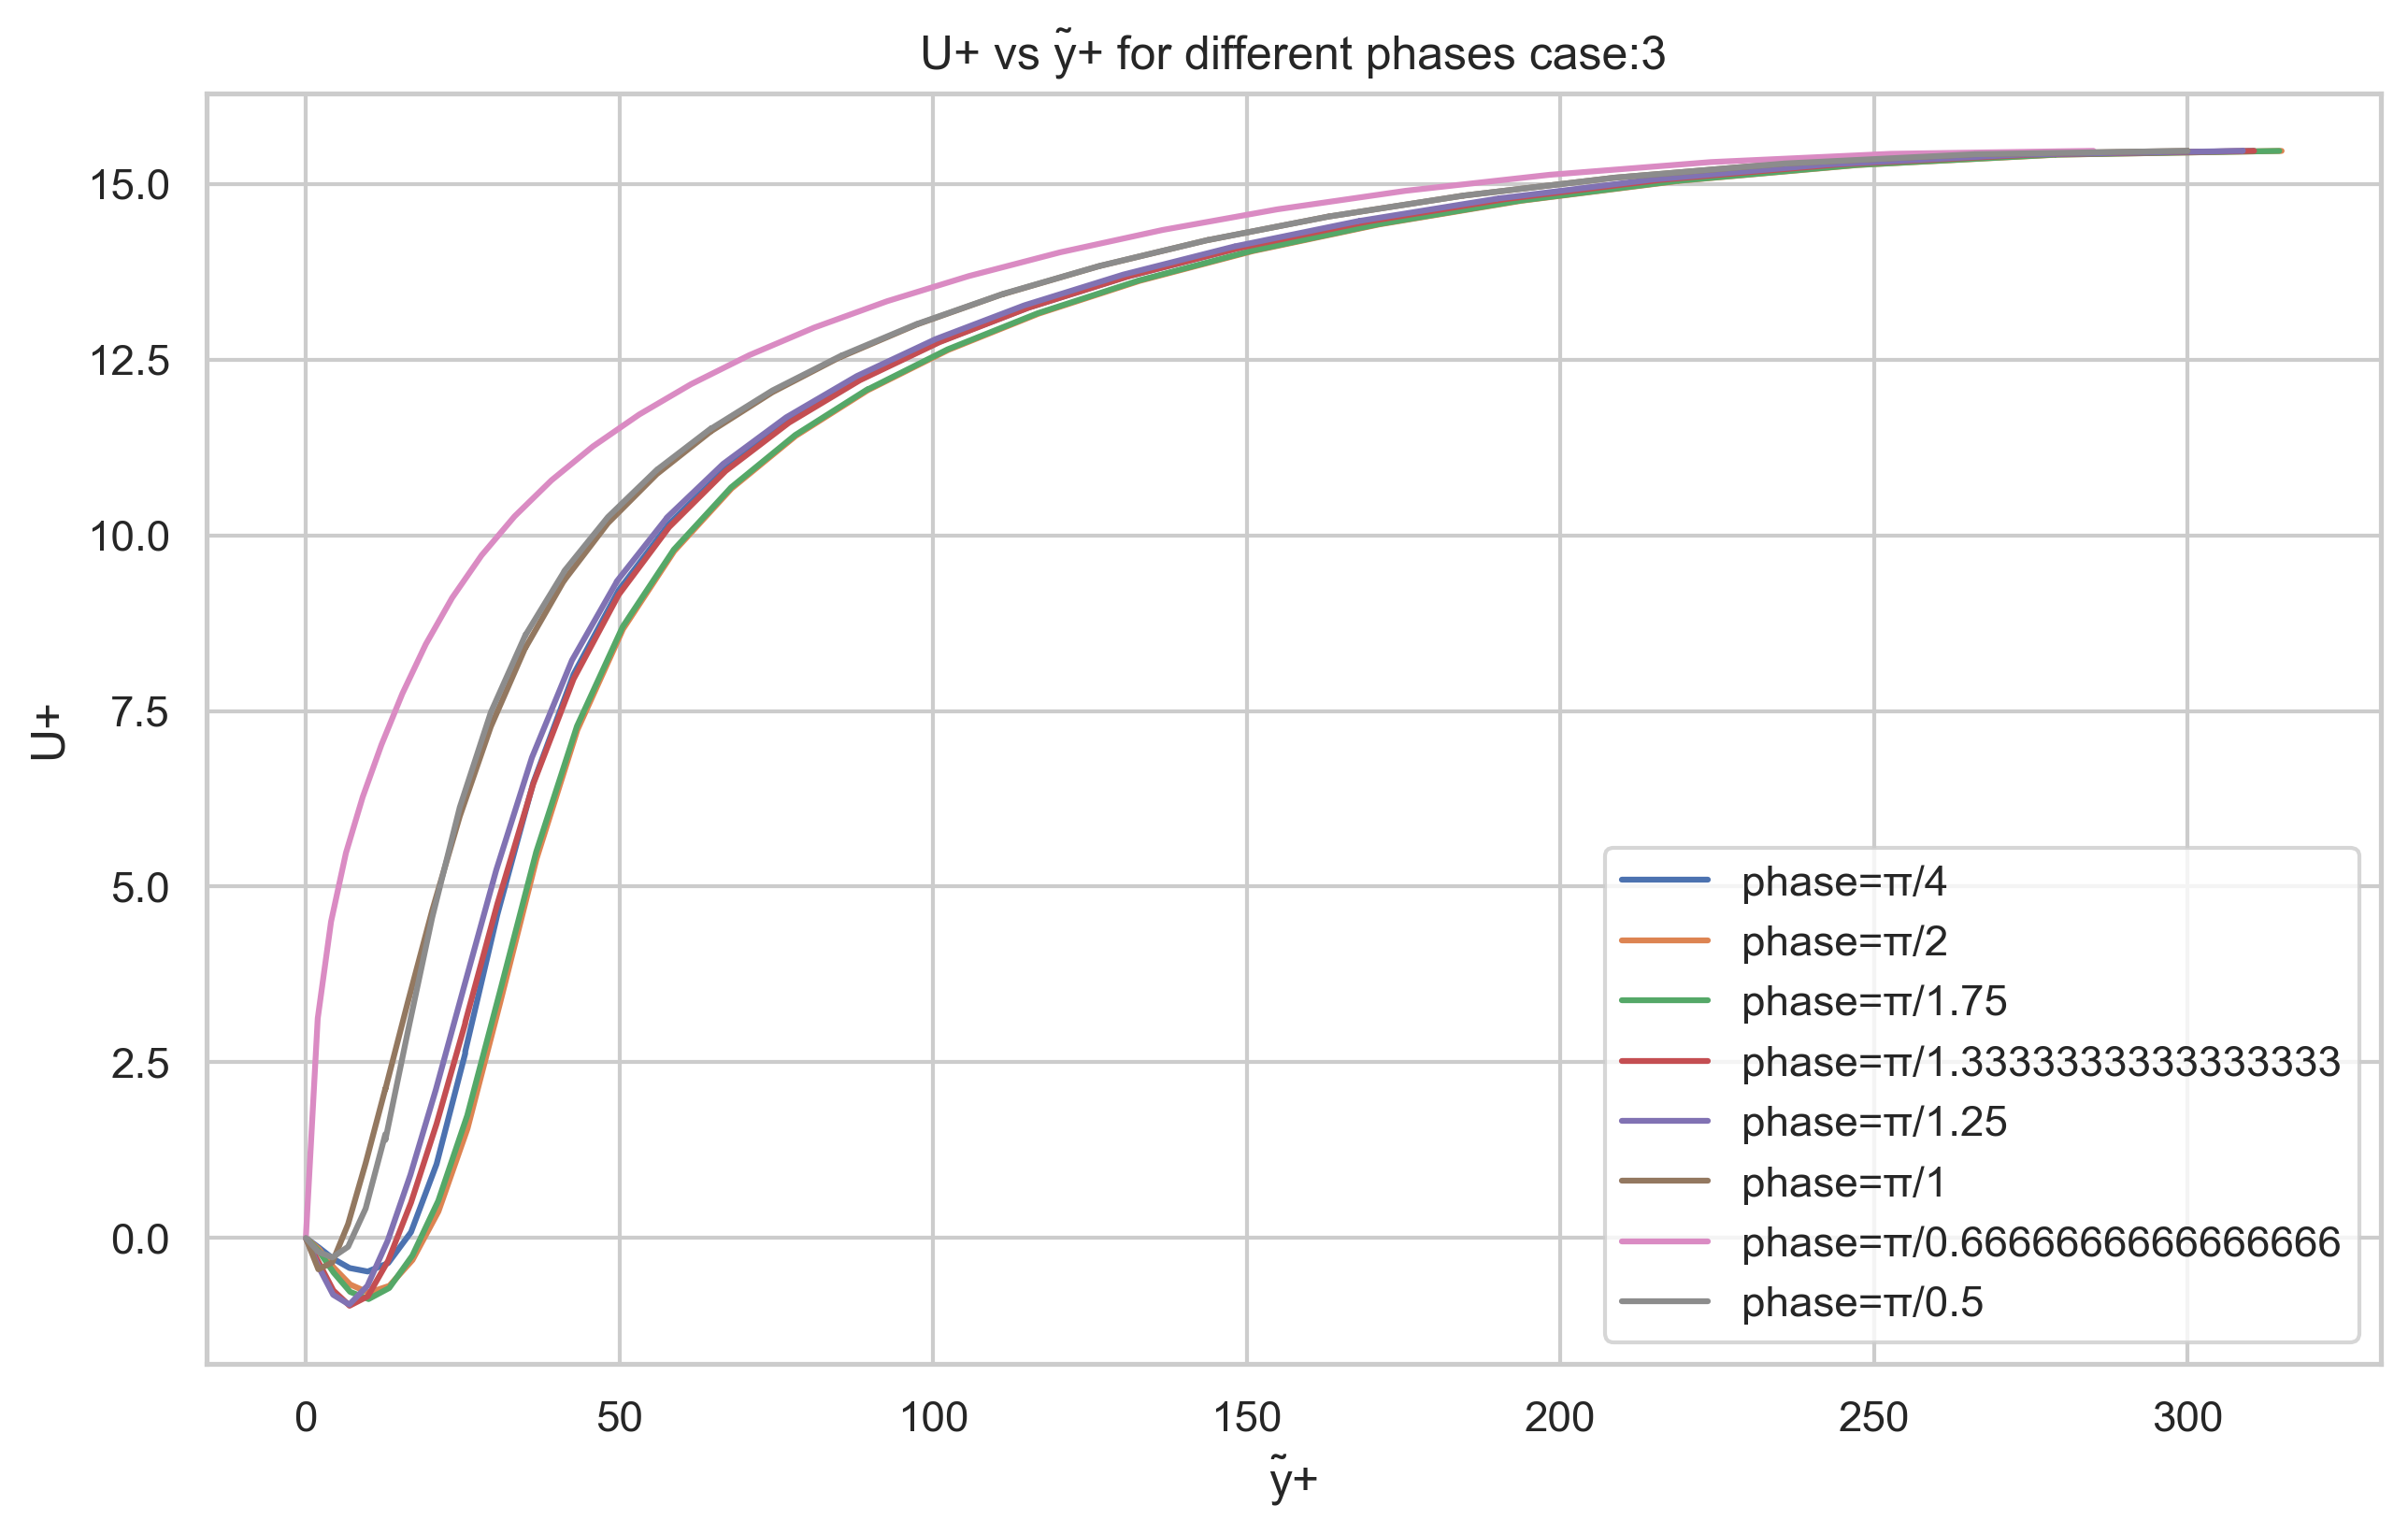

In [9]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

sim_num=3

for pi_div in [4, 2, 1.75, 1.3333333333333333, 1.25, 1, 0.6666666666666666, 0.5 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus_wavy', y='U_plus', label=f'phase=π/{pi_div}')

plt.title(f'U+ vs y\u0303+ for different phases case:{sim_num}')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'u+ vs y\u0303+ phase comparison sim{sim_num}.png')
plt.show()


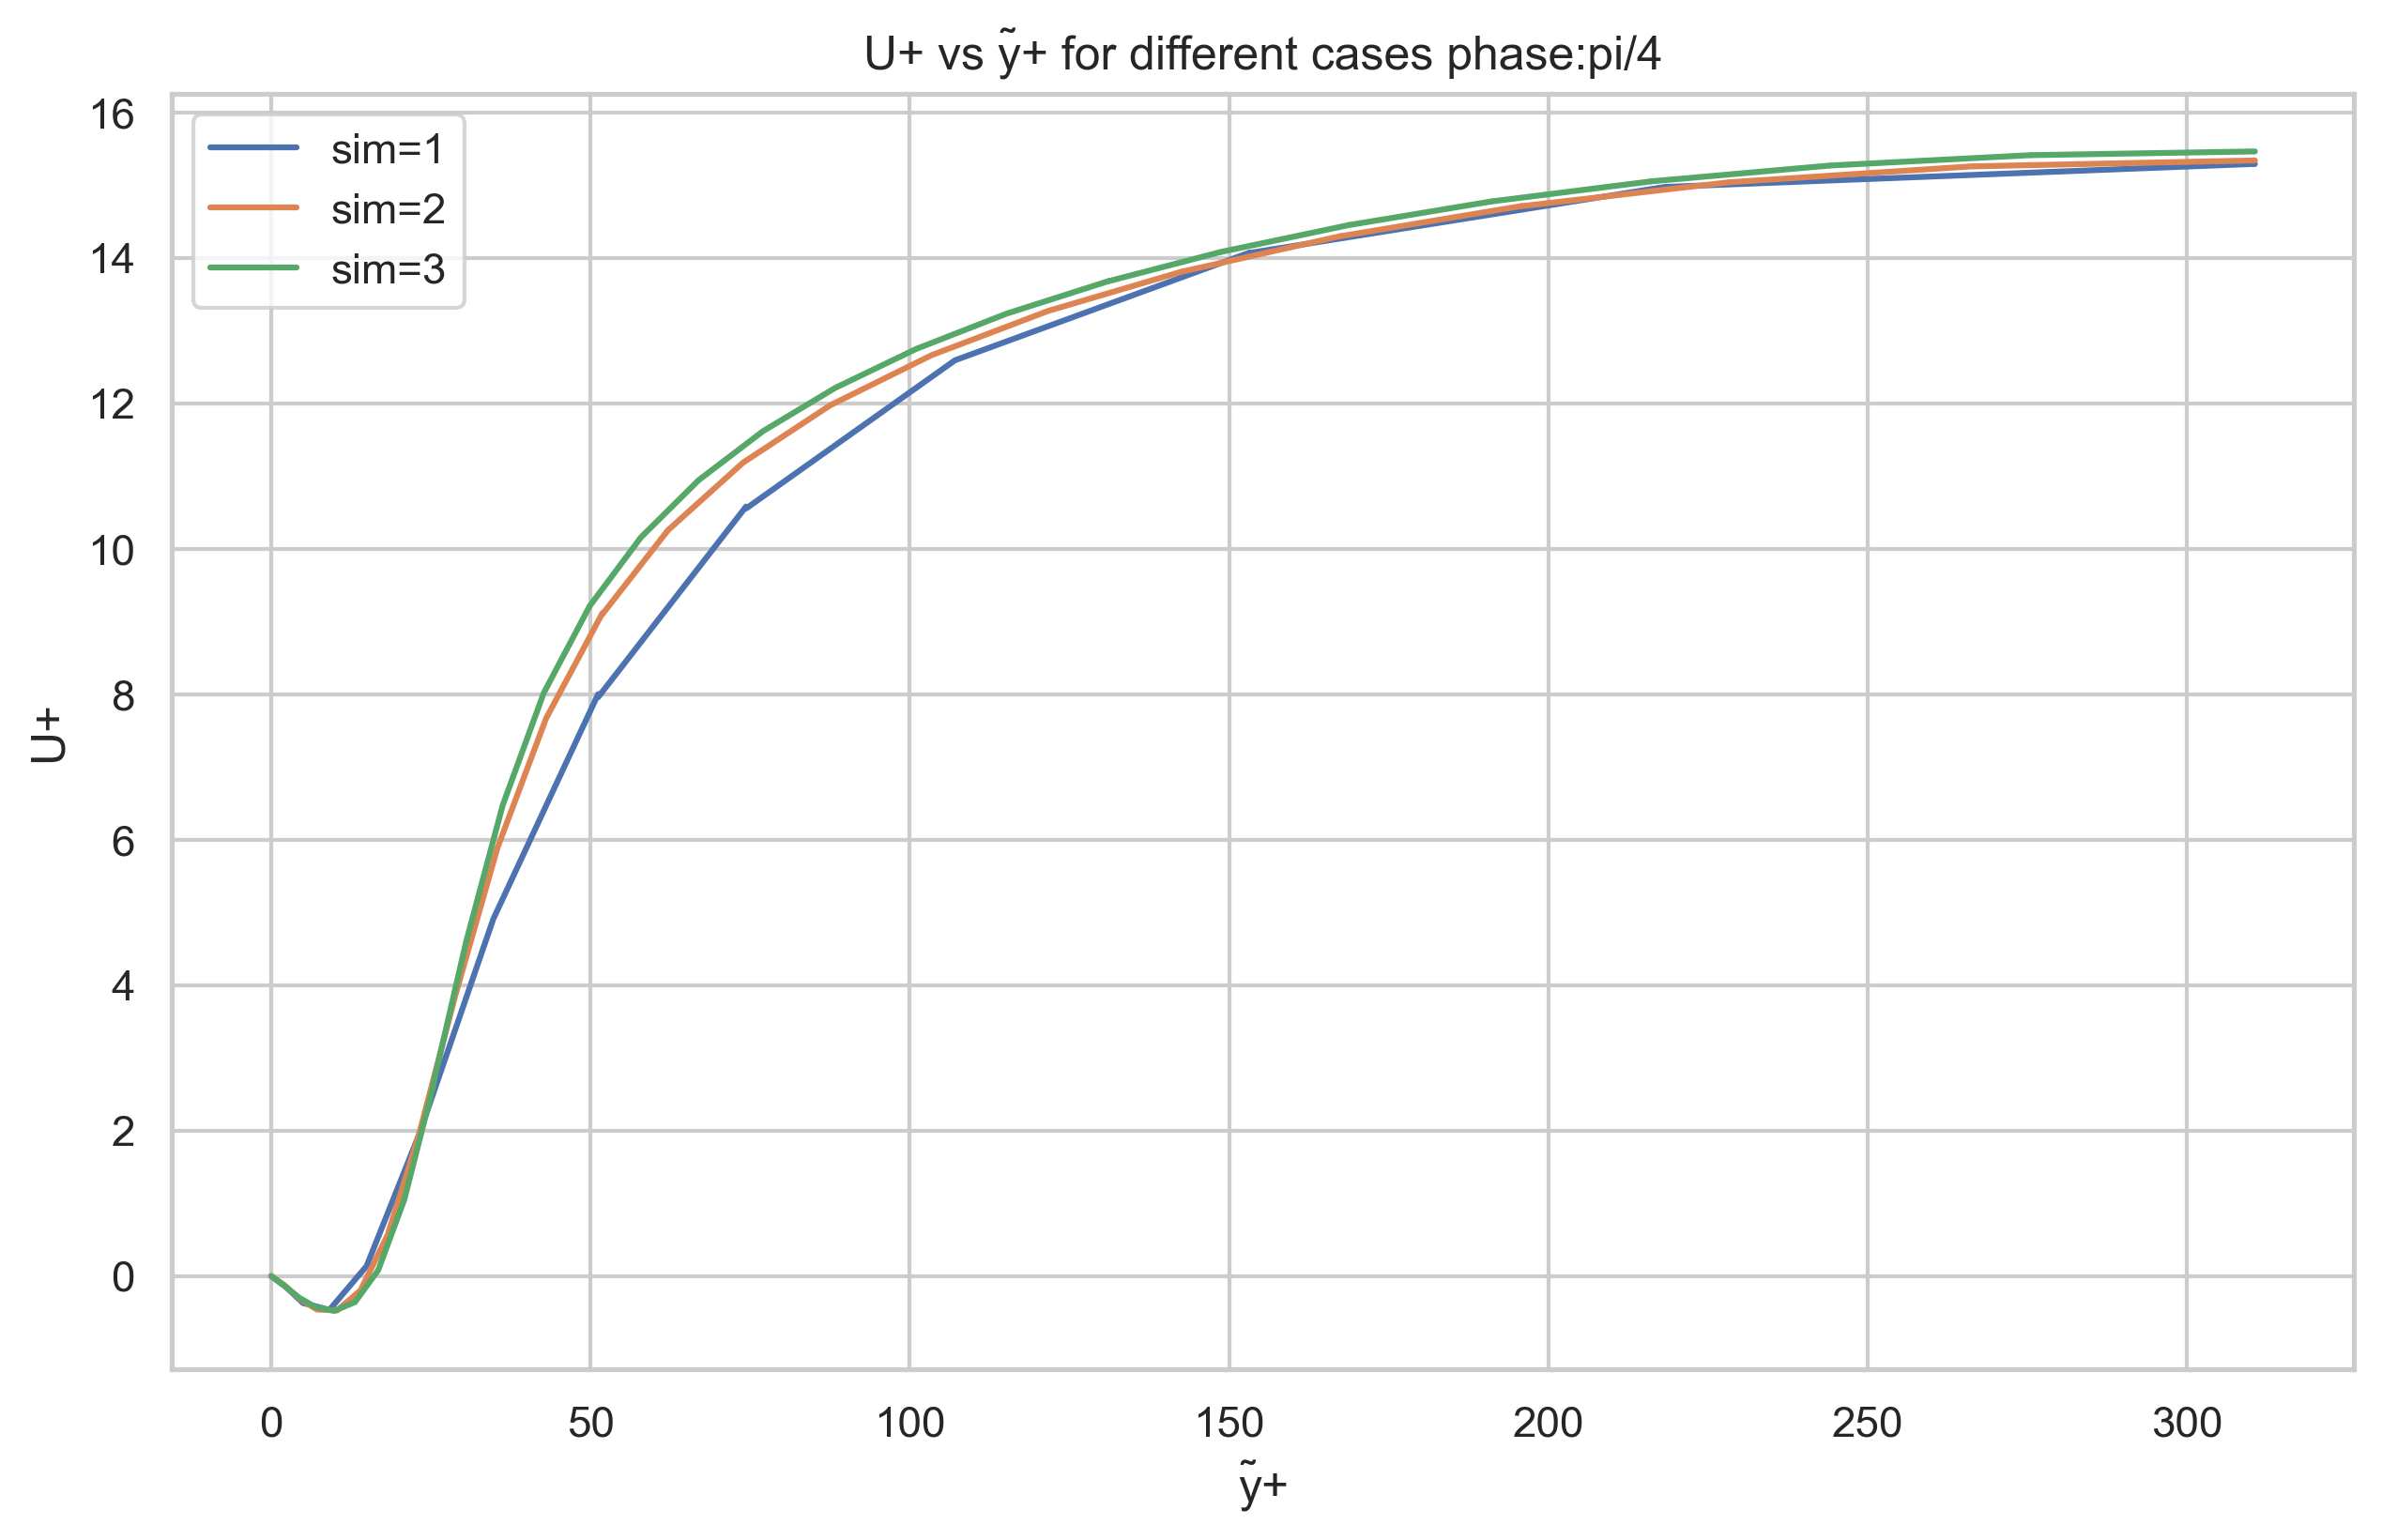

In [14]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

pi_div=4

for sim_num in [1,2,3 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus_wavy', y='U_plus', label=f'sim={sim_num}')

plt.title(f'U+ vs y\u0303+ for different cases phase:pi/{pi_div}')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'U+ vs y\u0303+ for different cases phase piby{pi_div}')
plt.show()


<ipython-input-26-498a9d7e07f7>:37: RuntimeWarning: Mean of empty slice
  U_avg = np.nanmean(interpolated_array, axis=0)


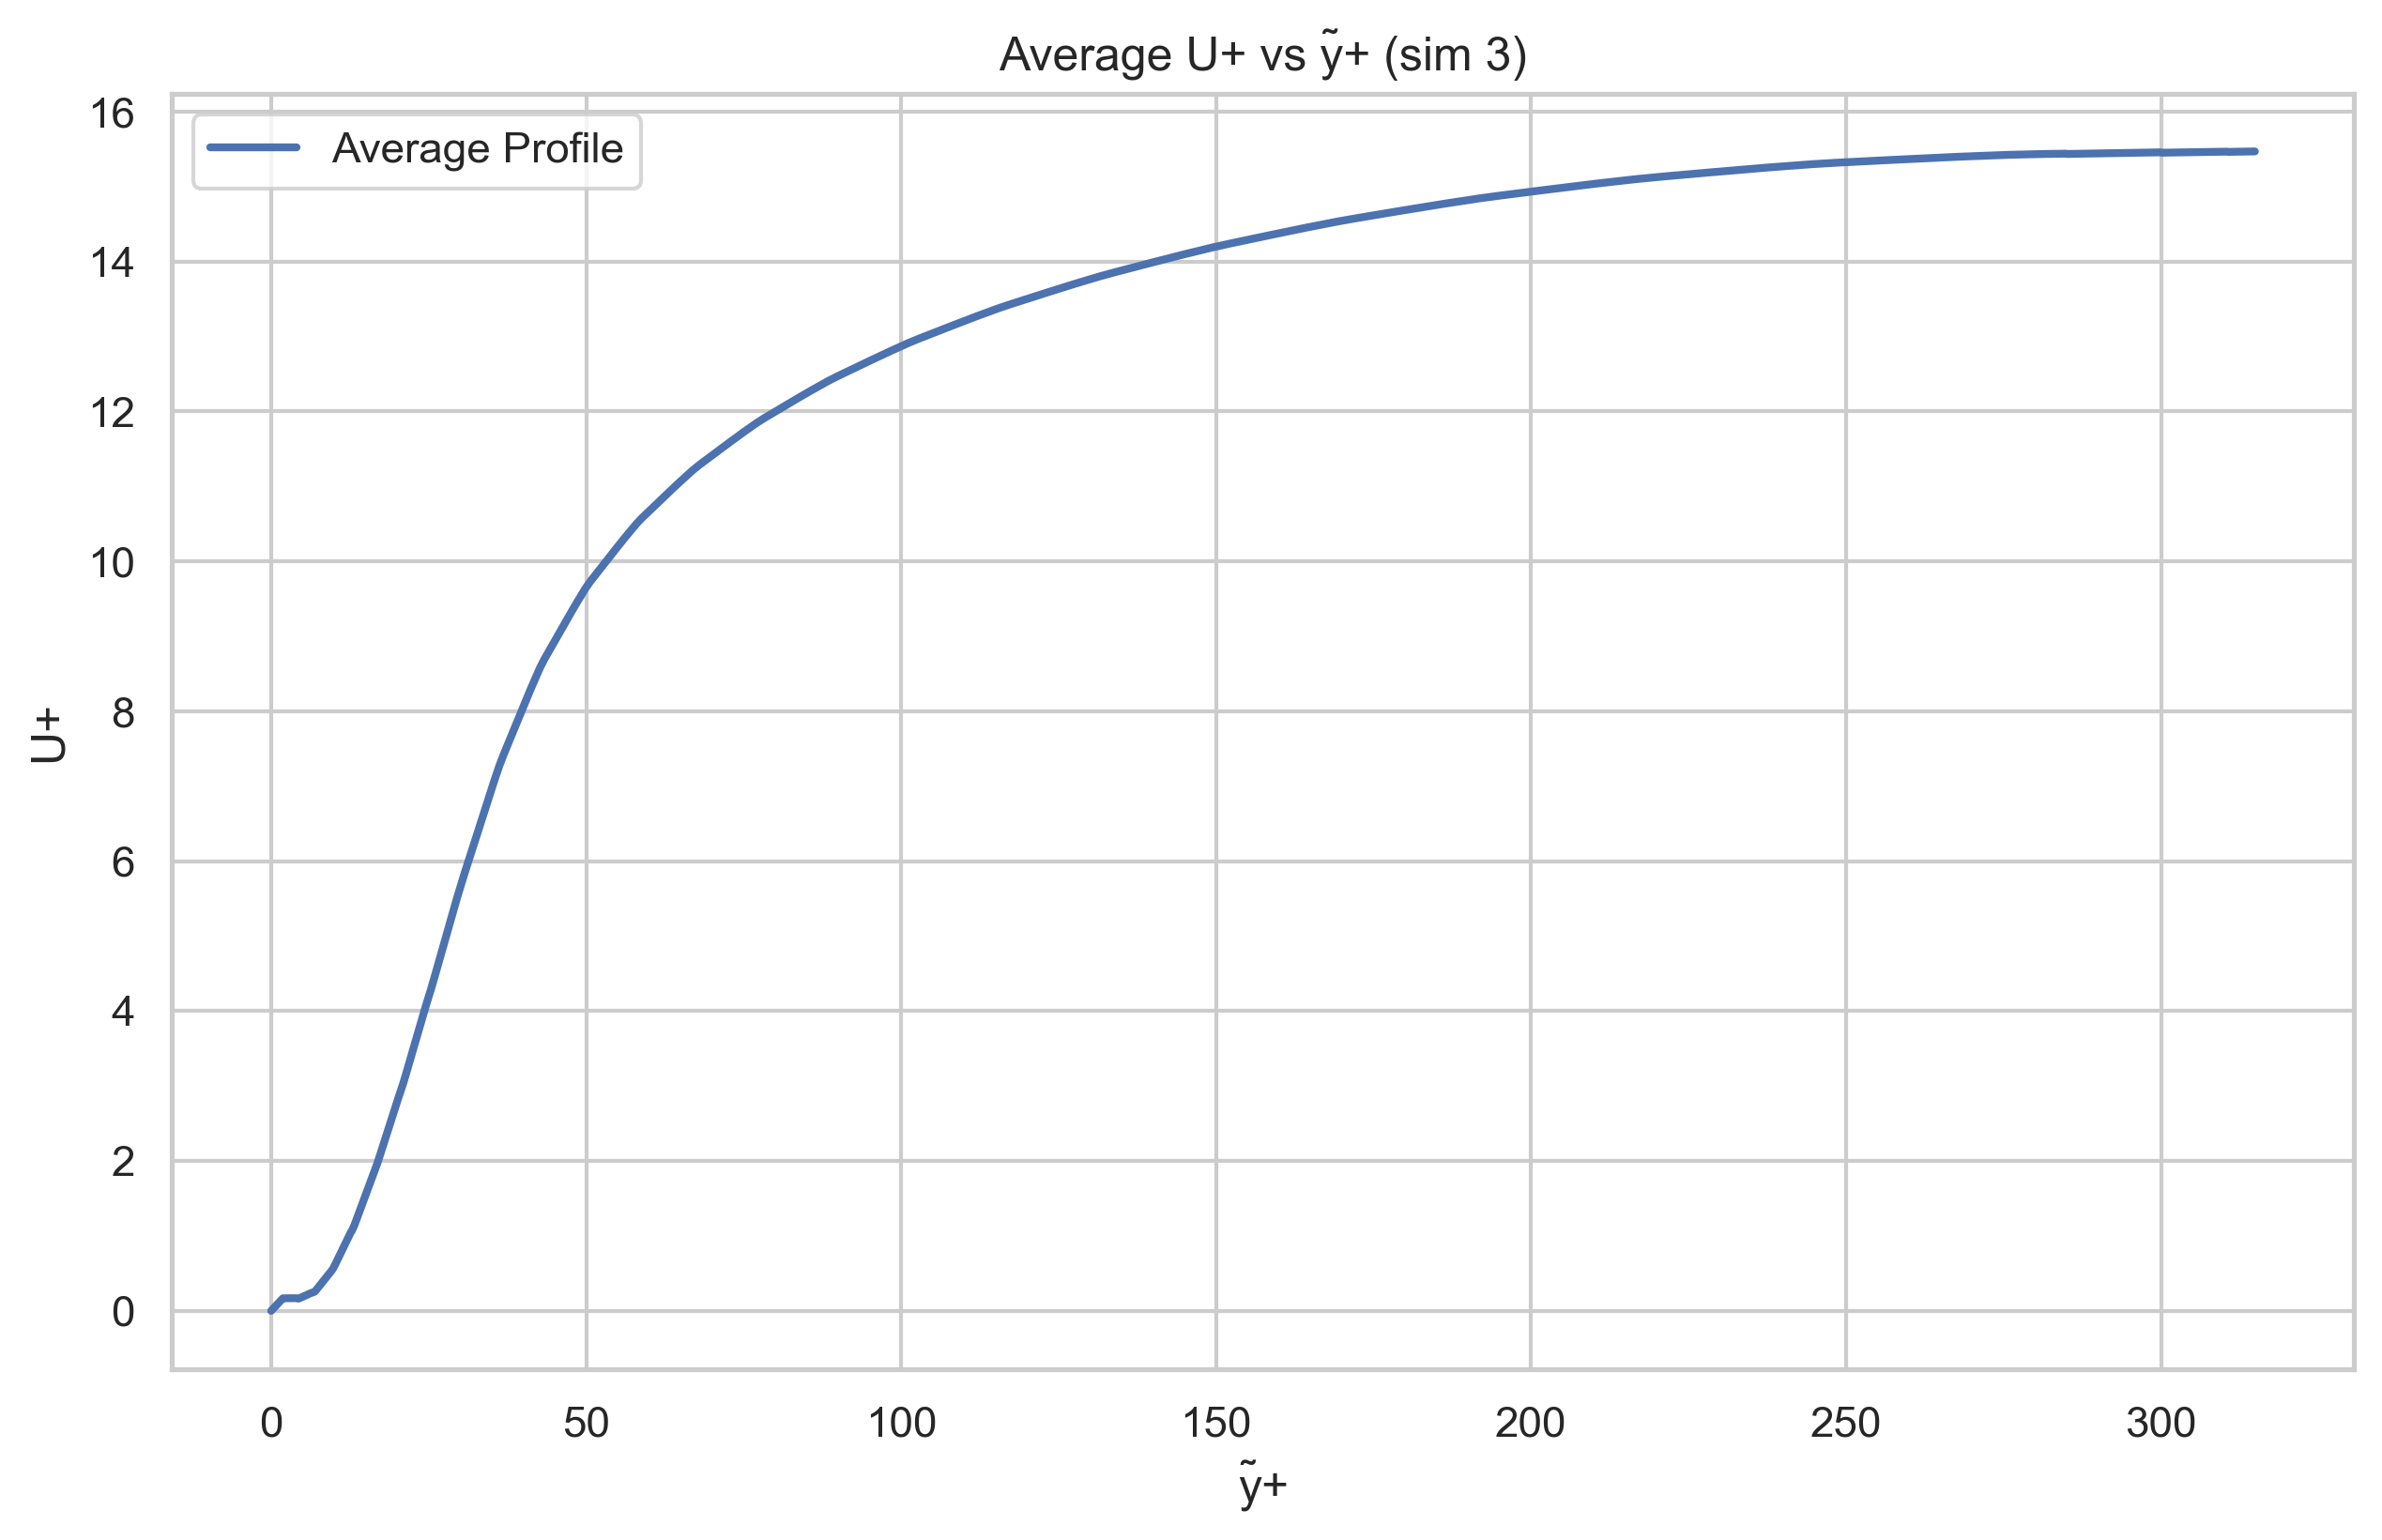

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# === Settings ===
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

sim_num = 3
pi_div_list = [4, 2, 1.75, 1.3333333333333333, 1.25, 1, 0.6666666666666666, 0.5]

# === Step 1: Define common y grid ===
common_y_plus = np.linspace(0, 400, 3000)  # adjust as needed

# === Step 2: Interpolate each dataset to the common grid ===
interpolated_U_plus = []

for pi_div in pi_div_list:
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path)

    # Drop NaNs and sort by y for safe interpolation
    df = df.dropna(subset=['y_plus_wavy', 'U_plus']).sort_values('y_plus_wavy')

    # Create interpolation function
    interp_func = interp1d(df['y_plus_wavy'], df['U_plus'], kind='linear',
                           bounds_error=False, fill_value=np.nan)
    
    # Interpolate to common y grid
    U_interp = interp_func(common_y_plus)
    interpolated_U_plus.append(U_interp)

# === Step 3: Convert to DataFrame and compute average (ignoring NaNs) ===
interpolated_array = np.vstack(interpolated_U_plus)  # shape: (8, len(common_y_plus))
U_avg = np.nanmean(interpolated_array, axis=0)

# === Step 4: Plot ===
plt.plot(common_y_plus, U_avg, label='Average Profile', linewidth=2)
plt.title(f'Average U+ vs y\u0303+ (sim {sim_num})')
plt.xscale('log')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.grid(True)
plt.legend()
plt.savefig(f'avg_u+_vs_y_wavy+_sim{sim_num}.png')
plt.show()
